<a href="https://colab.research.google.com/github/BrendaGuadalupeVazquez/Simulaci-n-II/blob/main/MuestreoImportancia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**REDUCCIÓN DE VARIANZA: Muestreo importancia**


10/10/25

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

Queremos estimar:
$$\int_0^1 cos(\frac{\pi x}{2}) dx$$

In [56]:
def f(x):
    return np.cos((x*np.pi)/2)

In [57]:
def g(x):
  return (24/24-(np.pi**2))*(1-(((np.pi**2)*(x**2))/8))

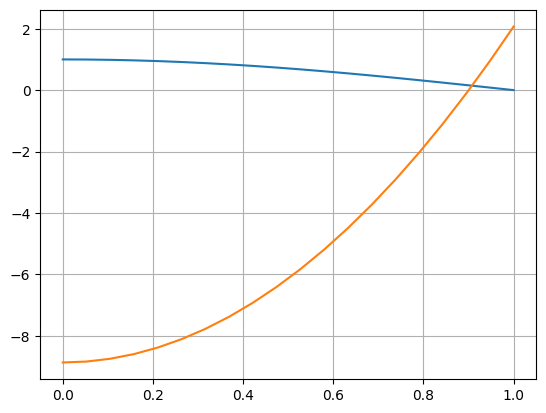

In [58]:
X=np.linspace(0,1,20)
plt.plot(X,f(X))
plt.plot(X,g(X))
plt.grid()

In [59]:
def muestra_g(n):
  lista=[]
  c=(24/(24-(np.pi**2)))
  for i in range(n):
    u=rd.random()
    v=rd.uniform(0,c)
    if v <= g(u):
      lista.append(u)
  return lista,np.std(lista)/np.sqrt(n)

In [60]:
M=muestra_g(1000)

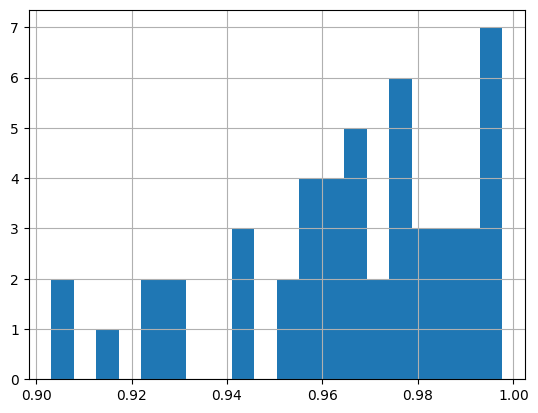

In [61]:
plt.hist(M[0],bins=20)
plt.grid()

In [62]:
def crudo(N):
  G=[]
  for i in muestra_g(N)[0]:
    G.append(f(i)/g(i))
  return G,np.std(G)/np.sqrt(N)


In [63]:
R=crudo(1000)

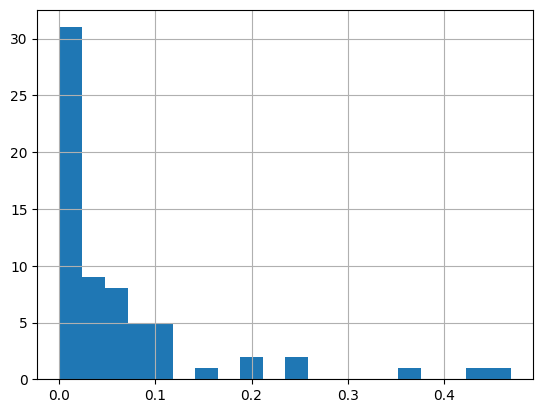

In [64]:
plt.hist(R[0],bins=20)
plt.grid()

Comparamos con el método de MC crudo, para verificar el porcentaje que reduce su varianza

In [67]:
var_red=(1-((muestra_g(1000)[1])**2)/((crudo(1000)[1])**2))*100
print("Reducción de varianza (%):",round(var_red,3))

Reducción de varianza (%): 96.912
